# CHAMP Transects Notebook

<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

In [69]:
import pyodbc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import warnings
warnings.filterwarnings("ignore")

In [2]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=P:\Temp\tmiesse\for_Jeff_transects\Charlotte_CHAMP.mdb;')
cursor = conn.cursor()
cursor.execute('select * from EROSION')
temp = cursor.fetchall()
conn.close()
table = pd.DataFrame(temp)
df =pd.DataFrame(columns=table.index)
for i, row in enumerate(table[0]):
    try:
        df[i] = list(row)
    except:
        print(row)
        break
dfE = df.T
dfE.rename(columns={0:'Transect', 1:'Station', 2:'Elevation'}, inplace=True)
dfE.head()
transects = list(dfE['Transect'].unique() )
print('{} Transects in this database'.format(len(transects)))

383 Transects in this database


In [3]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=P:\Temp\tmiesse\for_Jeff_transects\Charlotte_CHAMP.mdb;')
cursor = conn.cursor()
cursor.execute('select * from TRANSECT')
temp = cursor.fetchall()
conn.close()
table2 = pd.DataFrame(temp)
dfT =pd.DataFrame(columns=table2.index)
for i, row in enumerate(table2[0]):
    try:
        dfT[i] = list(row)
    except:
        print(row)
        break
dfT2 = dfT.T
dfT2.rename(columns={0:'Transect', 1:'Station', 2:'Elevation'}, inplace=True)
dfT2.head()
transects_orig = list(dfT2['Transect'].unique())
print('{} Transects in this database'.format(len(transects_orig)))

383 Transects in this database


In [4]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=P:\Temp\tmiesse\for_Jeff_transects\Charlotte_CHAMP.mdb;')
cursor = conn.cursor()
cursor.execute('select * from [WHAFIS PART 2]')
temp = cursor.fetchall()
conn.close()
table3 = pd.DataFrame(temp)
dfW =pd.DataFrame(columns=table3.index)
for i, row in enumerate(table3[0]):
    try:
        dfW[i] = list(row)
    except:
        print(row)
        break
dfW2 = dfW.T
dfW2.rename(columns={0:'Transect', 1:'WHAFIS_CARD', 2:'Stations',3:'Wave_height',4:'Wave_period',5:'Wave_crest_elevation'}, inplace=True)
dfW2.head()
transects_wave = list(dfW2['Transect'].unique())
print('{} Transects in this database'.format(len(transects_wave)))

381 Transects in this database


In [5]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=P:\Temp\tmiesse\for_Jeff_transects\Charlotte_CHAMP.mdb;')
cursor = conn.cursor()
cursor.execute('select * from STILLWATER')
temp = cursor.fetchall()
conn.close()
table4 = pd.DataFrame(temp)
dfS =pd.DataFrame(columns=table4.index)
for i, row in enumerate(table4[0]):
    try:
        dfS[i] = list(row)
    except:
        print(row)
        break
dfS2 = dfS.T
dfS2.rename(columns={0:'Transect', 1:'Station', 2:'10_year_swell',3:'100_year_swell'}, inplace=True)
dfS2.head()
transects_still = list(dfS2['Transect'].unique())
print('{} Transects in this database'.format(len(transects_still)))

381 Transects in this database


In [6]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=P:\Temp\tmiesse\for_Jeff_transects\Charlotte_CHAMP.mdb;')
cursor = conn.cursor()
cursor.execute('select * from [WHAFIS PART 6]')
temp = cursor.fetchall()
conn.close()
table5 = pd.DataFrame(temp)
dfZ =pd.DataFrame(columns=table5.index)
for i, row in enumerate(table5[0]):
    try:
        dfZ[i] = list(row)
    except:
        print(row)
        break
dfZ2 = dfZ.T
dfZ2.rename(columns={0:'Transect', 1:'Station begin', 2:'elevation begin',3:'station end',4:'elevation end',5:'zone',
                    6:'zone elevation',7:'FHF'}, inplace=True)
dfZ2.head()
transects_zone = list(dfZ2['Transect'].unique())
print('{} Transects in this database'.format(len(transects_zone)))

381 Transects in this database


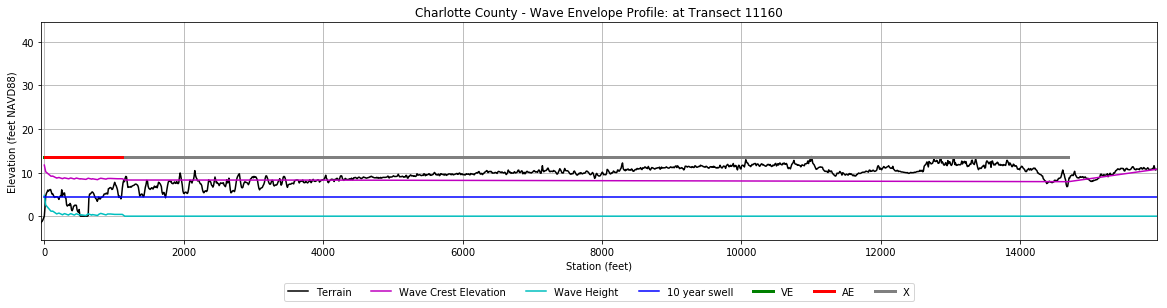

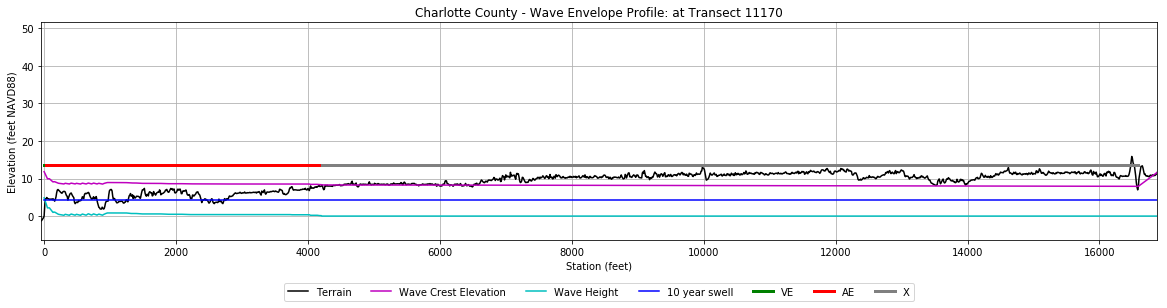

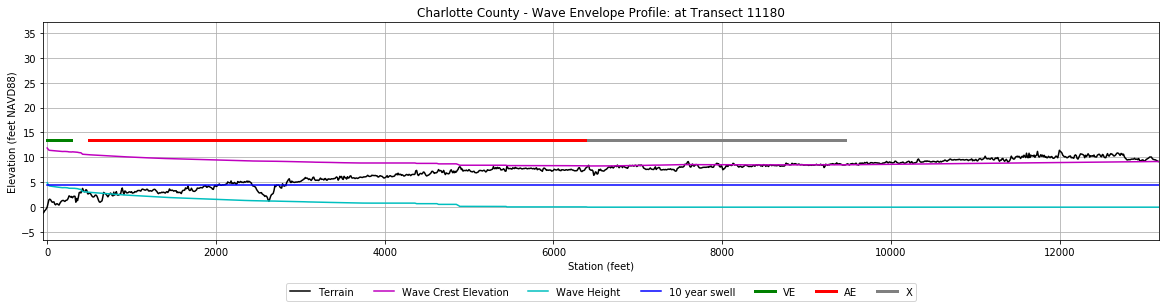

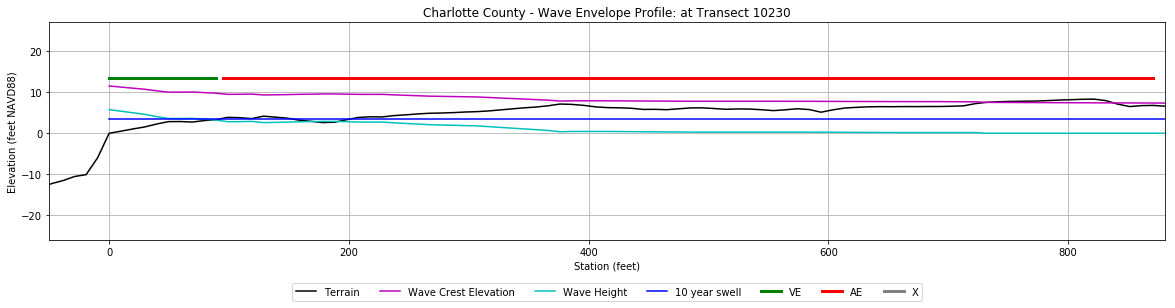

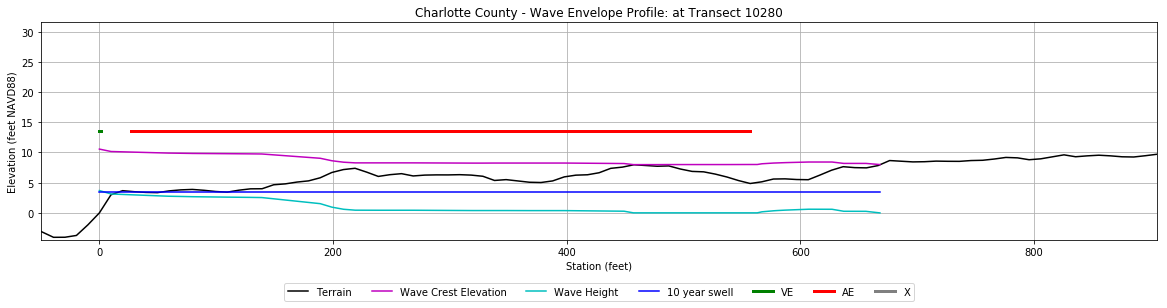

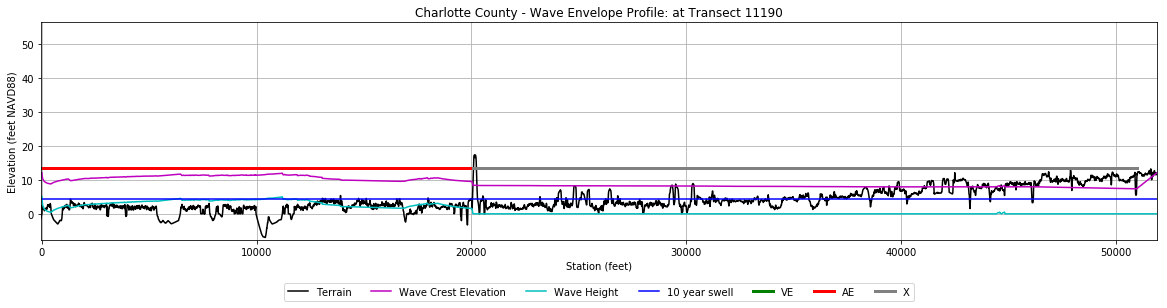

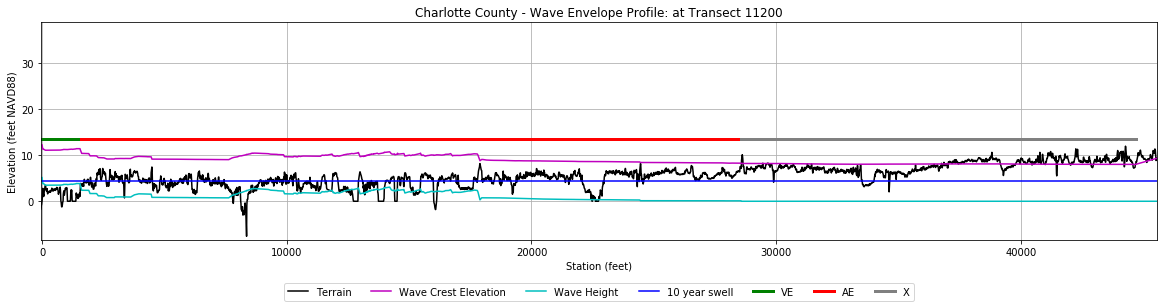

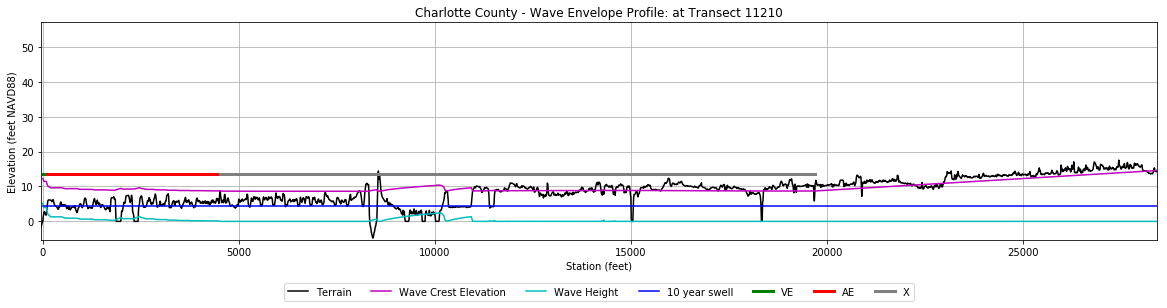

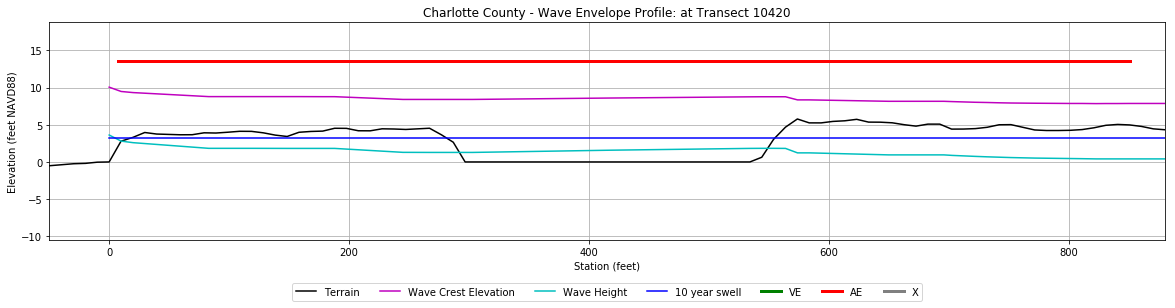

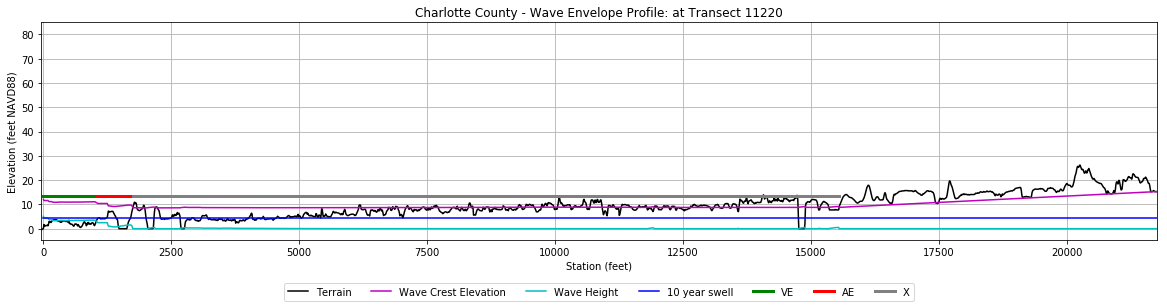

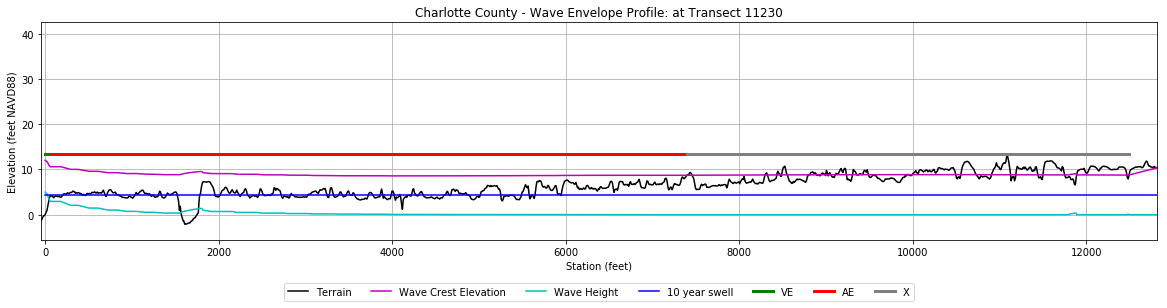

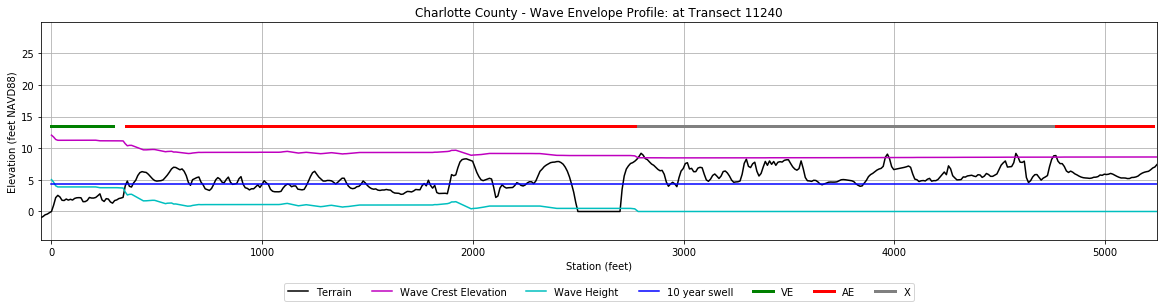

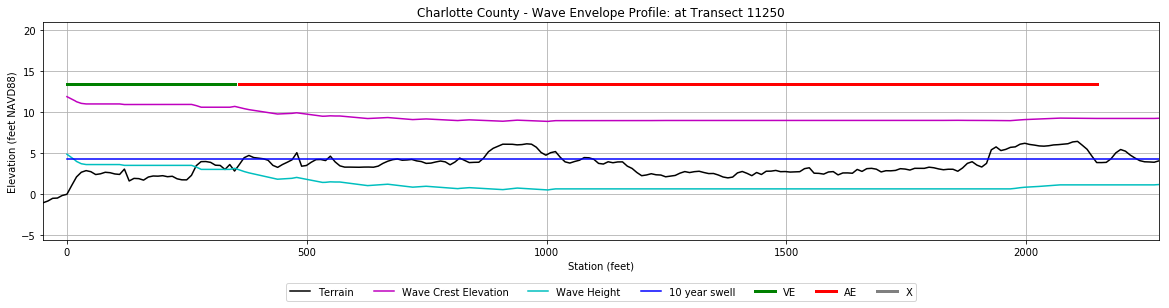

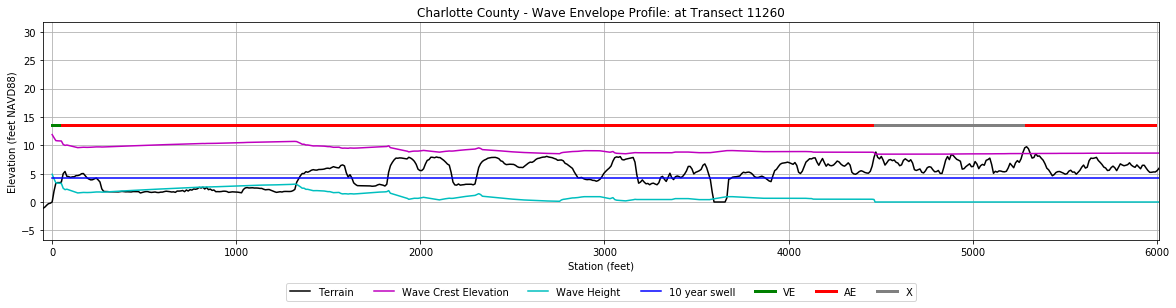

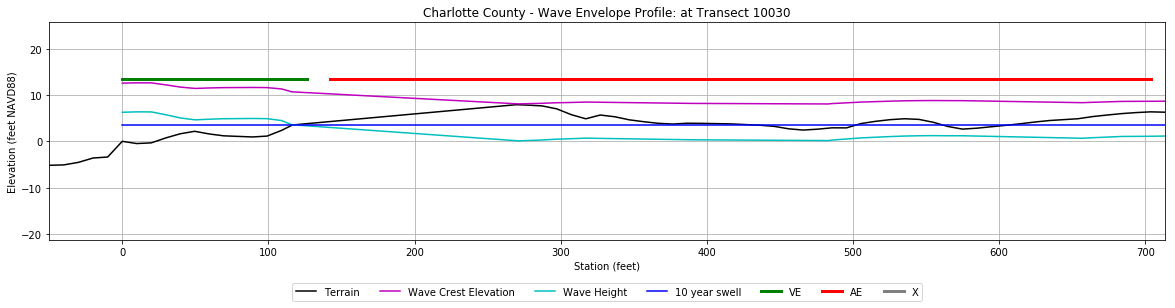

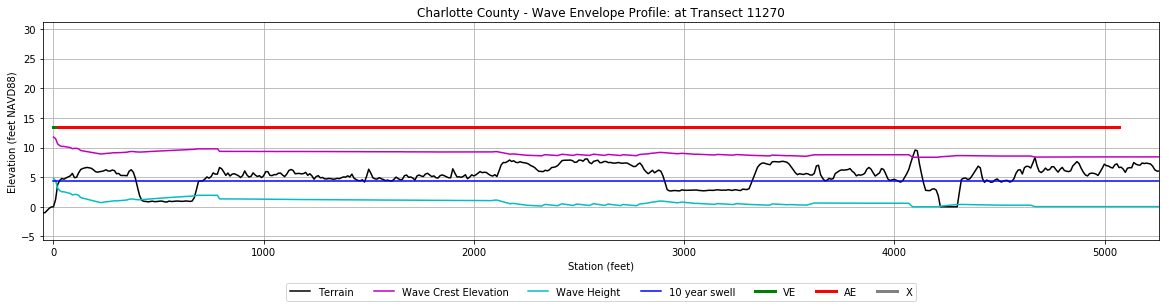

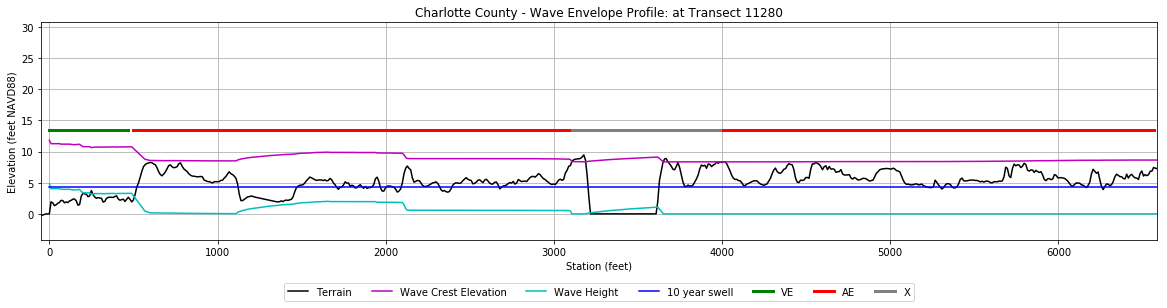

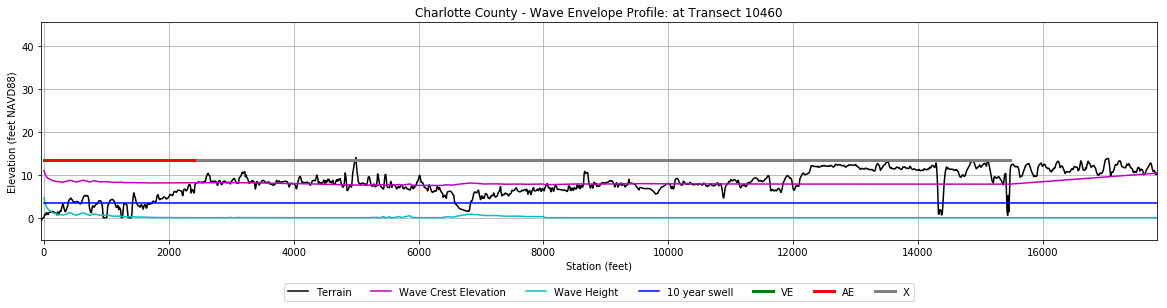

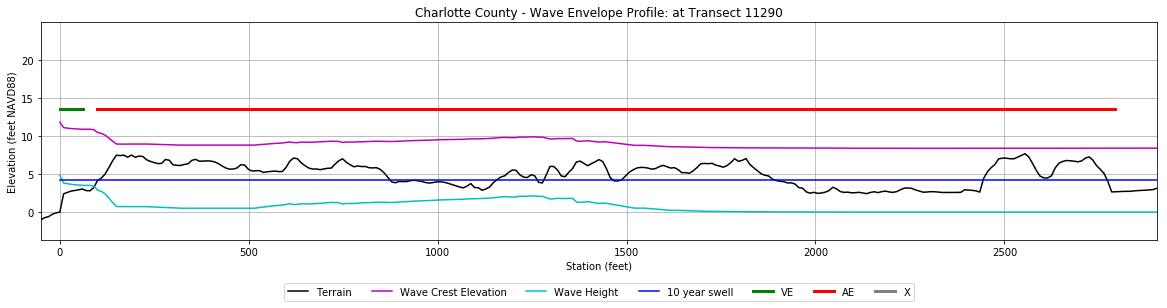

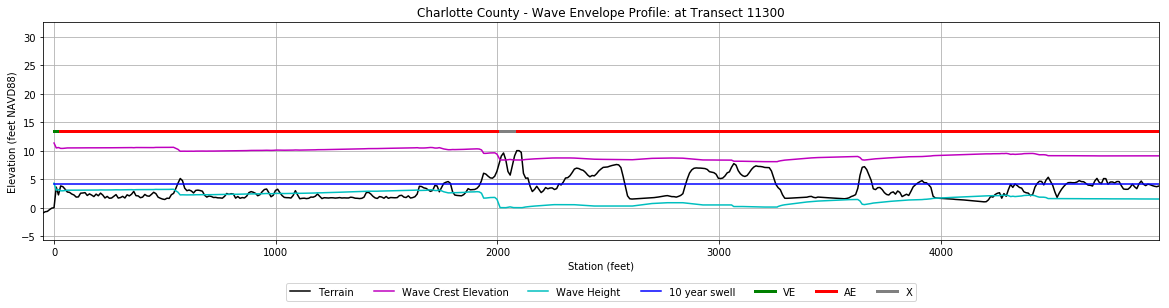

In [85]:
title = 'Charlotte County - Wave Envelope Profile'
for t in transects[100:120]:
    erosion_profile = dfE[dfE['Transect'] == t]
    sorted_erosion = erosion_profile.sort_values(by='Station')
    original_profile = dfT2[dfT2['Transect'] == t]
    sorted_original = original_profile.sort_values(by='Station')
    zone_profile = dfZ2[dfZ2['Transect'] == t]
    sorted_zone = zone_profile.sort_values(by='Station begin') 
    fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(sorted_original['Station'], sorted_original['Elevation'],'--k')
    ax.plot(sorted_erosion['Station'], sorted_erosion['Elevation'],'k')    
    if t in transects_wave:
        wave_profile = dfW2[dfW2['Transect'] == t]
        sorted_wave = wave_profile.sort_values(by='Stations')
        ax.plot(sorted_wave['Stations'], sorted_wave['Wave_crest_elevation'],'-m')
        ax.plot(sorted_wave['Stations'], sorted_wave['Wave_height'],'-c')
        still_profile = dfS2[dfS2['Transect'] == t]
        sorted_still = still_profile.sort_values(by='Station')
        ax.plot(sorted_still['Station'], sorted_still['10_year_swell'],'-b')
        ax.legend(['Terrain','Wave Crest Elevation','Wave Height','10 year swell','VE','AE','X'],
                  loc='upper center',bbox_to_anchor=(0.5,-0.175),ncol=7)
        
        ax.plot(sorted_zone[sorted_zone['zone'].str.match('V')]['Station begin'],
                sorted_zone[sorted_zone['zone'].str.match('V')]['elevation begin']*0+13.5,'-g',linewidth=3.0)
        
        ax.plot(sorted_zone[sorted_zone['zone'].str.match('A')]['Station begin'],
                 sorted_zone[sorted_zone['zone'].str.match('A')]['elevation begin']*0+13.5,'r',linewidth=3.0)
        
        ax.plot(sorted_zone[sorted_zone['zone'].str.match('X')]['Station begin'],
                 sorted_zone[sorted_zone['zone'].str.match('X')]['elevation begin']*0+13.5,'grey',linewidth=3.0)
        
        ax.legend(['Terrain','Wave Crest Elevation','Wave Height','10 year swell','VE','AE','X'],
                  loc='upper center',bbox_to_anchor=(0.5,-0.175),ncol=7)

            
    else:
        ax.legend(['Terrain'],loc='upper center',bbox_to_anchor=(0.5,-0.175),ncol=2)
    #ax.axvline(0, color = 'black')
    ax.set_xlim(-50, sorted_erosion['Station'].max())
    ax.set_ylim(1.1*sorted_erosion['Elevation'].min(), 3.25*sorted_erosion['Elevation'].max())
    ax.set_xlabel('Station (feet)')
    ax.set_ylabel('Elevation (feet NAVD88)')
    ax.set_title(title+': at Transect {}'.format(t))
    
    plt.grid(True)